# 회귀 

- 목적 : 주어진 입력 변수(독립 변수, X)를 기반으로 결과 변수(종속 변수, Y)의 패턴을 찾고 미래 값을 예측하기 위함.

    - **k-최근접 이웃 회귀** :
        - 한계 : 훈련 셋 범위의 밖의 샘플을 예측할 수 없음. -> 선형회귀 활용 필요
        - from sklearn.neighbors import KNeighborsRegressor
    - **선형 회귀** : `y = aX + b`
        - 한계 : 모든 데이터 관계를 "직선"으로 표현 -> 다중회귀 활용 필요 (곡선 형태)
        - from sklearn.linear_model import LinearRegression
    - **다항 회귀** : `y = ax + by + cz + d` (여러개의 독립변수)
        - 서로 다른 특성의 데이터를 여러개 사용한 선형회귀
        - rom sklearn.preprocessing import PolynomialFeatures
-> 여러 특성을 만들다가 과대적합 발생할 우려 : 규제 모델(Lasso, Ridge) 적용

## 1.1 k-최근접 이웃 회귀

In [1]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [7]:
# 1. perch종만 뽑기

perch_data = df.loc[df['Species'] == 'Perch']
perch_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


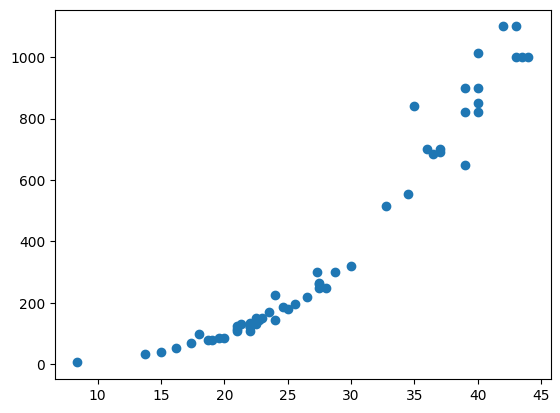

In [9]:
# 2. 길이, 무게의 산포도 확인

import matplotlib.pyplot as plt
plt.scatter(perch_data['Length2'], perch_data['Weight'])

In [10]:
# 3. 훈련, 테스트셋 나누고 섞어주기

from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = \
train_test_split(perch_data[['Length2']], perch_data[['Weight']])

In [15]:
train_target

,Weight
101,218.0
125,1100.0
88,130.0
126,1000.0
96,225.0
82,110.0
123,1100.0
91,130.0
115,690.0
86,120.0


In [16]:
# 4. k-최근접 이웃 회귀 (KNeighborsRegressor) / 학습, 평가

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [17]:
knr.fit(train_input,train_target)                  #훈련용셋 학습

KNeighborsRegressor()

In [20]:
# print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))        #테스트용셋 평가

0.9773949632183752
0.95259253793748


In [21]:
knr.predict([[50]]) # 훈련 셋 범위의 밖 샘플의 예측 정확도 떨어짐.

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[984.]])

### - 회귀모형의 성능 평가
- from sklearn.metrics import mean_absolute_error

In [22]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
print(test_input, test_prediction)

mae = mean_absolute_error(test_target, test_prediction)
print(mae) #오차의 평균 : 47

     Length2
83      21.0
87      22.0
99      25.0
110     34.5
93      22.7
78      18.7
114     37.0
112     36.5
119     40.0
127     44.0
121     40.0
106     28.0
124     43.0
105     27.5 [[123. ]
 [125. ]
 [185. ]
 [728.8]
 [139. ]
 [ 84. ]
 [752. ]
 [790. ]
 [818. ]
 [984. ]
 [818. ]
 [268.6]
 [984. ]
 [268.6]]
47.0


## 1.2 선형회귀

In [23]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [24]:
# 1. perch 종의 길이를 기반으로 무게 예측

perch_data = df.loc[df['Species'] == 'Perch']

perch_length = perch_data[['Length2']]
perch_weight = perch_data[['Weight']]

In [25]:
# 2. 훈련, 테스트셋 나누고 섞어주기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(perch_length, perch_weight)

In [26]:
# 3. 선형 회귀 (from sklearn.linear_model import LinearRegression) / 학습, 평가

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(train_input, train_target)

LinearRegression()

In [28]:
lr.score(test_input, test_target)

0.9414053337061021

In [30]:
# 4. 50cm일때 무게 예측값 : 1197

lr.predict([[50]]) 

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1197.48368508]])

## 1.3 다항 회귀

In [69]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
perch_data = df.loc[df['Species'] == 'Perch']
perch_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [70]:
# 1. 길이, 높이, 두께를 기준으로 무게 예측
perch_full = perch_data[['Length2', 'Height', 'Width']]
perch_weight = perch_data[['Weight']]

In [71]:
# 2. 훈련용, 테스트용 셋 넣고 섞어주기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(perch_full, perch_weight)

In [72]:
# 3. 다항회귀 (from sklearn.preprocessing import PolynomialFeatures) 

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False) 

In [73]:
# 4. 학습 
poly.fit(train_input)
train_poly = poly.transform(train_input)

train_poly.shape

(42, 9)

In [74]:
# 4.1 9개 특성, 조합을 확인
poly.get_feature_names_out() #특성공학 : 기존 특성으로 새로운 특성을 만들어 조합이 만들어짐 확인

array(['Length2', 'Height', 'Width', 'Length2^2', 'Length2 Height',
       'Length2 Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [75]:
# 5. 회귀 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 6. 훈련용 셋 학습, 평가
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9875567873276111

In [76]:
# 7. 테스트용 셋 평가
test_poly = poly.transform(test_input)

lr.score(test_poly, test_target)

0.9822221786444185

- ### 더 많은 특성이 필요한 경우

In [77]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape                               # 9 -> 55개의 특성의 조합이 생김.

(42, 55)

In [78]:
poly.get_feature_names_out() 

array(['Length2', 'Height', 'Width', 'Length2^2', 'Length2 Height',
       'Length2 Width', 'Height^2', 'Height Width', 'Width^2',
       'Length2^3', 'Length2^2 Height', 'Length2^2 Width',
       'Length2 Height^2', 'Length2 Height Width', 'Length2 Width^2',
       'Height^3', 'Height^2 Width', 'Height Width^2', 'Width^3',
       'Length2^4', 'Length2^3 Height', 'Length2^3 Width',
       'Length2^2 Height^2', 'Length2^2 Height Width',
       'Length2^2 Width^2', 'Length2 Height^3', 'Length2 Height^2 Width',
       'Length2 Height Width^2', 'Length2 Width^3', 'Height^4',
       'Height^3 Width', 'Height^2 Width^2', 'Height Width^3', 'Width^4',
       'Length2^5', 'Length2^4 Height', 'Length2^4 Width',
       'Length2^3 Height^2', 'Length2^3 Height Width',
       'Length2^3 Width^2', 'Length2^2 Height^3',
       'Length2^2 Height^2 Width', 'Length2^2 Height Width^2',
       'Length2^2 Width^3', 'Length2 Height^4', 'Length2 Height^3 Width',
       'Length2 Height^2 Width^2', 'Length2 Hei

In [79]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))                      # -> 과대적합 발생 (테스트셋에서의 성능이 낮음.)

0.9999999999996508
-3095.805103297479


### 1.3.1 규제 

- 훈련 세트의 과도한 학습 방지 (과대 적합 방지) 목적 (계수의 크기를 줄이는 것) `from sklearn.preprocessing import StandardScaler`
    - 릿지 : 계수를 제곱한 값을 기준으로 규제 적용 (선호) `from sklearn.linear_model import Ridge`
        - ridge = Ridge(alpha = alpha) #최적인 알파값을 찾아야 함.
    - 라쏘 : 절댓값을 기준으로 규제 적용 `from sklearn.linear_model import Lasso`
        - 아예 계수를 0으로 만들 수 있음.

In [80]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [81]:
train_scaled[:5]

array([[ 0.67179414,  0.84889777,  0.7912438 ,  0.56073352,  0.6590856 ,
         0.62615789,  0.73744469,  0.7054212 ,  0.65418204,  0.42660412,
         0.49193241,  0.46938869,  0.54781103,  0.52573115,  0.49094925,
         0.59473116,  0.57289847,  0.53800442,  0.49289665,  0.29131951,
         0.33797437,  0.32139038,  0.37943872,  0.36330691,  0.33808635,
         0.41571643,  0.39997343,  0.37473941,  0.34183137,  0.4468063 ,
         0.43133467,  0.40605233,  0.37275353,  0.33347635,  0.16563644,
         0.20005876,  0.18739929,  0.23145681,  0.2191797 ,  0.20036845,
         0.25972429,  0.24784998,  0.22907125,  0.20462414,  0.28475051,
         0.27325702,  0.25454311,  0.22982745,  0.20053105,  0.30643446,
         0.2952551 ,  0.27659627,  0.25165311,  0.22185612,  0.1886756 ],
       [ 1.4168333 ,  1.25411428,  0.78248113,  1.49832597,  1.37632659,
         1.0318854 ,  1.25042745,  0.93640863,  0.64395801,  1.52182774,
         1.41445677,  1.12071754,  1.30429572,  1.

In [83]:
# Ridge (alpha값 조정 = 규제의 정도 의미: 0.01, 0.1, 1.0, 10)

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.01)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.991545440450229
0.9883266624136553


In [85]:
# lasso

from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9893399307442997
0.990680135697334


C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.169e+04, tolerance: 4.288e+02
  model = cd_fast.enet_coordinate_descent(
